## Import Library yg dibutuhkan

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
from collections import Counter
warnings.filterwarnings("ignore")
%matplotlib inline

In [473]:
data = pd.read_csv('activity_km_07_01.csv')

In [474]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [475]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PH,16,1.795735
cahaya,26,2.918070
intensitas air,0,0.000000
suhu,27,3.030303
PPM,5,0.561167
tinggi air,0,0.000000
aksi,0,0.000000


## 1. Mengganti nama kolom yang menggunakan spasi

In [476]:
data.columns = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
data.columns

Index(['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [477]:
def cahaya(str):
    if str == "Ada":
        return 1
    elif str == "Tidak ada":
        return 2
    else:
        return str
data["cahaya"] = data["cahaya"].apply(cahaya)


def intensitas_air(str):
    if str == "Tinggi":
        return 4
    elif str == "Cukup":
        return 3
    elif str == "Rendah":
        return 2
    else:
        return 1
data["intensitas_air"] = data["intensitas_air"].apply(intensitas_air)


def aksi(str):
    if str == "Tidak melakukan apa-apa":
        return 1
    elif str == "Hidupkan Lampu":
        return 2
    elif str == "Hidupkan Lampu dan Pompa nutrisi TDS":
        return 3
    else:
        return 4
data["aksi"] = data["aksi"].apply(aksi)

data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,4,27.0,188.0,622,3
1,5.7,1.0,4,26.9,79.0,557,3
2,6.0,1.0,4,27.0,11.0,491,3
3,6.5,1.0,4,27.1,345.0,12000,1
4,6.2,NaN,4,27.1,602.0,444,1
...,...,...,...,...,...,...,...
611,4.6,1.0,1,25.3,904.0,47,2
612,2.1,1.0,1,25.0,388.0,18,3
613,3.2,1.0,1,25.3,793.0,19,2
614,1.4,1.0,1,25.4,1052.0,3,2


## 3. Handle Missing Value

In [478]:
data.isnull().sum()

PH                16
cahaya            26
intensitas_air     0
suhu              27
PPM                5
tinggi_air         0
aksi               0
dtype: int64

In [479]:
data['PH'] = data['PH'].fillna(data['PH'].mean())

In [480]:
data['cahaya'] = data['cahaya'].fillna(data['cahaya'].mean())

In [481]:
data['suhu'] = data['suhu'].fillna(data['suhu'].mean())

In [482]:
data['PPM'] = data['PPM'].fillna(data['PPM'].mean())

In [483]:
data.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

In [484]:
data.describe()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,6.655167,1.488136,2.500000,29.364007,1032.836334,288.173701,1.334416
std,3.003387,0.489594,1.118943,14.605947,630.037913,622.457710,0.683261
min,0.000000,1.000000,1.000000,-300.000000,1.000000,0.000000,1.000000
25%,5.500000,1.000000,1.750000,27.100000,490.500000,50.000000,1.000000
50%,6.500000,1.488136,2.500000,29.500000,995.500000,230.000000,1.000000
75%,7.525000,2.000000,3.250000,32.900000,1603.000000,429.500000,1.000000
max,14.000000,2.000000,4.000000,40.600000,2149.000000,12000.000000,4.000000


## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

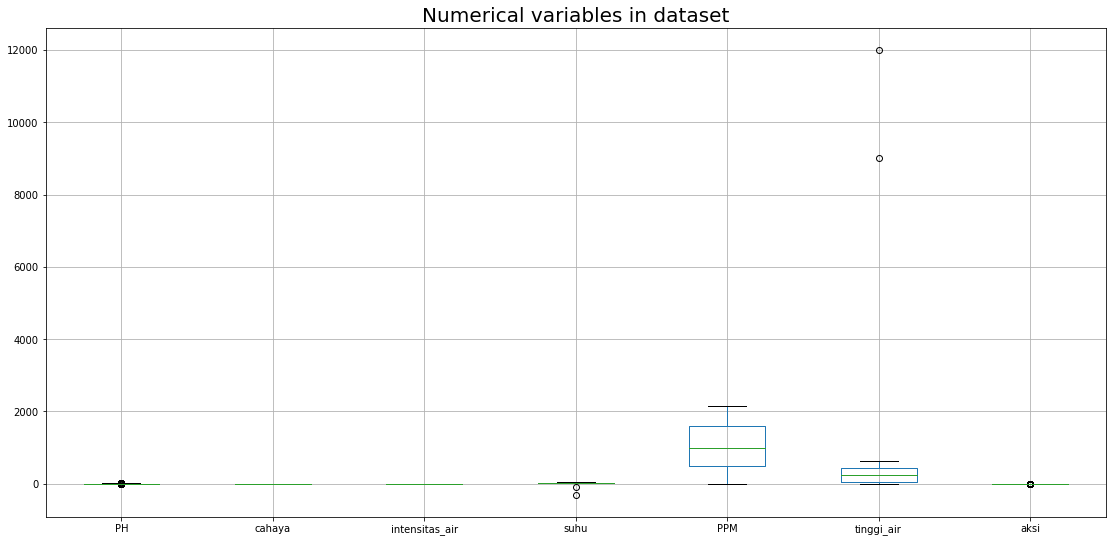

In [485]:
num_cols = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()

In [486]:
def iqr(data):
    iqr = data.describe()['75%'] - data.describe()['25%']
    return iqr


def lower_bound(data,iqr):
    lower_bound = data.describe()['25%'] - (1.5*iqr)
    return lower_bound


def upper_bound(data,iqr):
    upper_bound = data.describe()['75%'] + (1.5*iqr)
    return upper_bound

In [487]:
iqr_PH = iqr(data['PH'])
lower_PH = lower_bound(data['PH'],iqr_PH)
upper_PH = upper_bound(data['PH'],iqr_PH)

print('IQR PH: {0} ; Lower bound PH: {1} ; Upper bound PH: {2}'.format(iqr_PH,lower_PH,upper_PH))

IQR PH: 2.0250000000000004 ; Lower bound PH: 2.4624999999999995 ; Upper bound PH: 10.5625


{'boxes': [<matplotlib.lines.Line2D at 0x7f67442a3650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f674432db10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6745a04210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f674432ded0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f67442a3590>,
  <matplotlib.lines.Line2D at 0x7f67442a38d0>]}

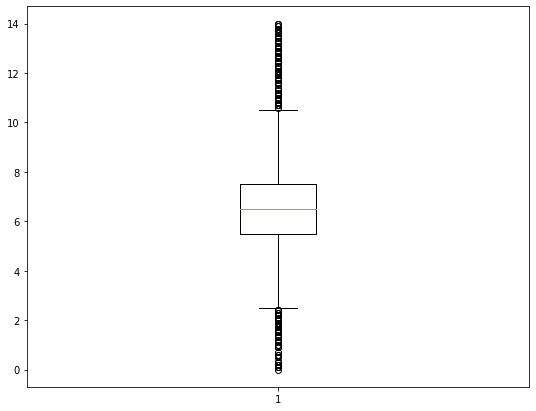

In [488]:
fig = plt.figure(figsize = (9,7))
plt.boxplot(data['PH'])

In [489]:
Outlier_upper_PH = data.PH[data.PH >= upper_PH]
Outlier_upper_PH

50     10.7
51     12.0
53     11.8
55     12.0
59     12.1
       ... 
544    12.3
567    10.9
568    10.9
593    13.0
595    12.7
Name: PH, Length: 77, dtype: float64

In [490]:
Outlier_lower_PH = data.PH[data.PH <= lower_PH]
Outlier_lower_PH

33     0.2
34     2.0
36     1.1
37     1.3
48     2.2
      ... 
586    2.3
587    1.9
610    0.2
612    2.1
614    1.4
Name: PH, Length: 68, dtype: float64

In [491]:
iqr_cahaya = iqr(data['cahaya'])
lower_cahaya = lower_bound(data['cahaya'],iqr_cahaya)
upper_cahaya = upper_bound(data['cahaya'],iqr_cahaya)

print('IQR cahaya: {0} ; Lower bound cahaya: {1} ; Upper bound cahaya: {2}'.format(iqr_cahaya,lower_cahaya,upper_cahaya))

IQR cahaya: 1.0 ; Lower bound cahaya: -0.5 ; Upper bound cahaya: 3.5


{'boxes': [<matplotlib.lines.Line2D at 0x7f674436c1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f67443a0d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6744358150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f674434edd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f67443a0a10>,
  <matplotlib.lines.Line2D at 0x7f67443a0990>]}

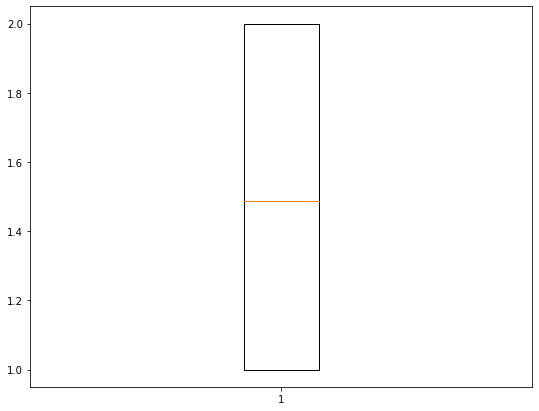

In [492]:
fig = plt.figure(figsize = (9,7))
plt.boxplot(data['cahaya'])

In [493]:
Outlier_upper_cahaya = data.cahaya[data.cahaya >= upper_cahaya]
Outlier_upper_cahaya

Series([], Name: cahaya, dtype: float64)

In [494]:
Outlier_lower_cahaya = data.cahaya[data.cahaya <= lower_cahaya]
Outlier_lower_cahaya

Series([], Name: cahaya, dtype: float64)

In [495]:
iqr_intensitas_air = iqr(data['intensitas_air'])
lower_intensitas_air = lower_bound(data['intensitas_air'],iqr_intensitas_air)
upper_intensitas_air = upper_bound(data['intensitas_air'],iqr_intensitas_air)

print('IQR intensitas_air: {0} ; Lower bound intensitas_air: {1} ; Upper bound intensitas_air: {2}'.format(iqr_intensitas_air,lower_intensitas_air,upper_intensitas_air))

IQR intensitas_air: 1.5 ; Lower bound intensitas_air: -0.5 ; Upper bound intensitas_air: 5.5


{'boxes': [<matplotlib.lines.Line2D at 0x7f674445b710>],
 'caps': [<matplotlib.lines.Line2D at 0x7f674fb3abd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f67443f1f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f67443f9fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f674445b890>,
  <matplotlib.lines.Line2D at 0x7f6745971410>]}

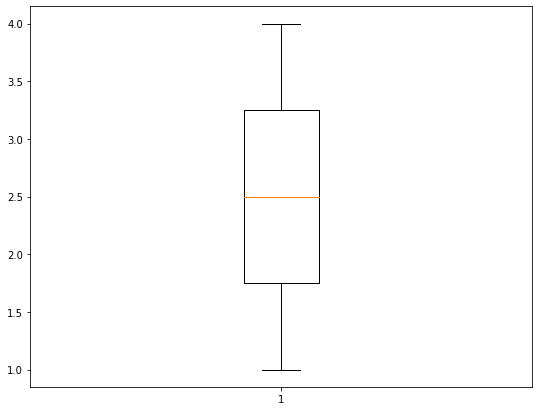

In [496]:
fig = plt.figure(figsize = (9,7))
plt.boxplot(data['intensitas_air'])

In [497]:
Outlier_upper_intensitas_air = data.intensitas_air[data.intensitas_air >= upper_intensitas_air]
Outlier_upper_intensitas_air

Series([], Name: intensitas_air, dtype: int64)

In [498]:
Outlier_lower_intensitas_air = data.intensitas_air[data.intensitas_air <= lower_intensitas_air]
Outlier_lower_intensitas_air

Series([], Name: intensitas_air, dtype: int64)

In [499]:
iqr_suhu = iqr(data['suhu'])
lower_suhu = lower_bound(data['suhu'],iqr_suhu)
upper_suhu = upper_bound(data['suhu'],iqr_suhu)

print('IQR suhu: {0} ; Lower bound suhu: {1} ; Upper bound suhu: {2}'.format(iqr_suhu,lower_suhu,upper_suhu))

IQR suhu: 5.799999999999997 ; Lower bound suhu: 18.400000000000006 ; Upper bound suhu: 41.599999999999994


{'boxes': [<matplotlib.lines.Line2D at 0x7f67443c0e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f67444292d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6744433610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6744429390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f67443c0a10>,
  <matplotlib.lines.Line2D at 0x7f67443c0990>]}

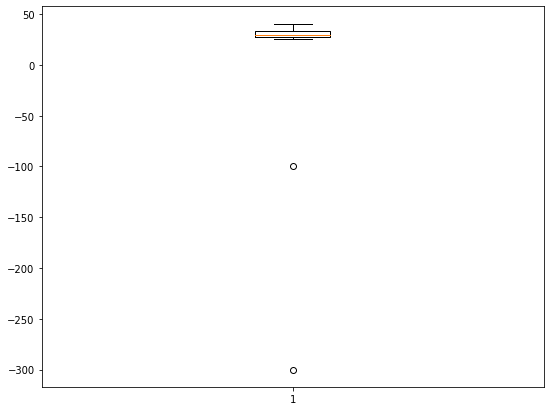

In [500]:
fig = plt.figure(figsize = (9,7))
plt.boxplot(data['suhu'])

In [501]:
Outlier_upper_suhu = data.suhu[data.suhu >= upper_suhu]
Outlier_upper_suhu

Series([], Name: suhu, dtype: float64)

In [502]:
Outlier_lower_suhu = data.suhu[data.suhu <= lower_suhu]
Outlier_lower_suhu

109   -300.0
118   -100.0
Name: suhu, dtype: float64

In [503]:
iqr_PPM = iqr(data['PPM'])
lower_PPM = lower_bound(data['PPM'],iqr_PPM)
upper_PPM = upper_bound(data['PPM'],iqr_PPM)

print('IQR PPM: {0} ; Lower bound PPM: {1} ; Upper bound PPM: {2}'.format(iqr_PPM,lower_PPM,upper_PPM))

IQR PPM: 1112.5 ; Lower bound PPM: -1178.25 ; Upper bound PPM: 3271.75


{'boxes': [<matplotlib.lines.Line2D at 0x7f6744c00fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f67500e0350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6745b61490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f67450d2850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f67446ea2d0>,
  <matplotlib.lines.Line2D at 0x7f6750105110>]}

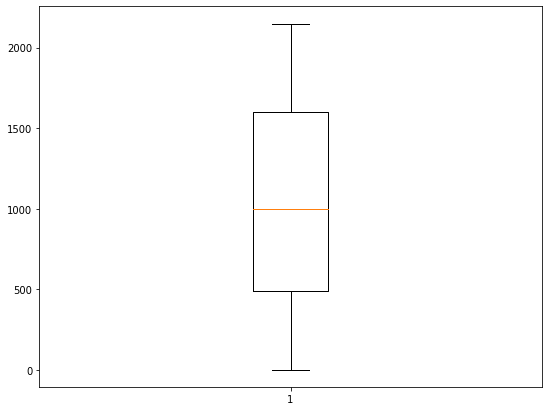

In [504]:
fig = plt.figure(figsize = (9,7))
plt.boxplot(data['PPM'])

In [505]:
Outlier_upper_PPM = data.PPM[data.PPM >= upper_PPM]
Outlier_upper_PPM

Series([], Name: PPM, dtype: float64)

In [506]:
Outlier_lower_PPM = data.PPM[data.PPM <= lower_PPM]
Outlier_lower_PPM

Series([], Name: PPM, dtype: float64)

In [507]:
iqr_tinggi_air = iqr(data['tinggi_air'])
lower_tinggi_air = lower_bound(data['tinggi_air'],iqr_tinggi_air)
upper_tinggi_air = upper_bound(data['tinggi_air'],iqr_tinggi_air)

print('IQR tinggi_air: {0} ; Lower bound tinggi_air: {1} ; Upper bound tinggi_air: {2}'.format(iqr_tinggi_air,lower_tinggi_air,upper_tinggi_air))

IQR tinggi_air: 379.5 ; Lower bound tinggi_air: -519.25 ; Upper bound tinggi_air: 998.75


{'boxes': [<matplotlib.lines.Line2D at 0x7f674404f890>],
 'caps': [<matplotlib.lines.Line2D at 0x7f674407d310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6744438f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6744438e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f674404f5d0>,
  <matplotlib.lines.Line2D at 0x7f674407de10>]}

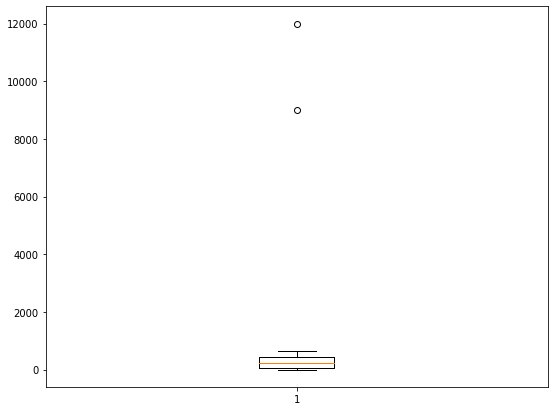

In [508]:
fig = plt.figure(figsize = (9,7))
plt.boxplot(data['tinggi_air'])

In [509]:
Outlier_upper_tinggi_air = data.tinggi_air[data.tinggi_air >= upper_tinggi_air]
Outlier_upper_tinggi_air

3     12000
77     9000
Name: tinggi_air, dtype: int64

In [510]:
Outlier_lower_tinggi_air = data.tinggi_air[data.tinggi_air <= lower_tinggi_air]
Outlier_lower_tinggi_air

Series([], Name: tinggi_air, dtype: int64)

In [511]:
iqr_aksi = iqr(data['aksi'])
lower_aksi = lower_bound(data['aksi'],iqr_aksi)
upper_aksi = upper_bound(data['aksi'],iqr_aksi)

print('IQR aksi: {0} ; Lower bound aksi: {1} ; Upper bound aksi: {2}'.format(iqr_aksi,lower_aksi,upper_aksi))

IQR aksi: 0.0 ; Lower bound aksi: 1.0 ; Upper bound aksi: 1.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f6744259d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f674420a810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f67442894d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6744289d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6744259750>,
  <matplotlib.lines.Line2D at 0x7f674420a690>]}

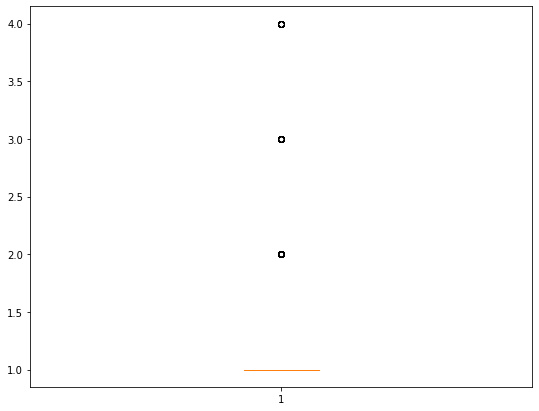

In [512]:
fig = plt.figure(figsize = (9,7))
plt.boxplot(data['aksi'])

In [513]:
Outlier_upper_aksi = data.aksi[data.aksi >= upper_aksi]
Outlier_upper_aksi

0      3
1      3
2      3
3      1
4      1
      ..
611    2
612    3
613    2
614    2
615    2
Name: aksi, Length: 616, dtype: int64

In [514]:
Outlier_lower_aksi = data.aksi[data.aksi <= lower_aksi]
Outlier_lower_aksi

3      1
4      1
8      1
33     1
39     1
      ..
569    1
570    1
574    1
575    1
579    1
Name: aksi, Length: 473, dtype: int64

## 5. Pisahkan data feature dengan label

In [515]:
#Data Feature
X = data.iloc[:, :6]
X

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air
0,6.5,1.000000,4,27.0,188.0,622
1,5.7,1.000000,4,26.9,79.0,557
2,6.0,1.000000,4,27.0,11.0,491
3,6.5,1.000000,4,27.1,345.0,12000
4,6.2,1.488136,4,27.1,602.0,444
...,...,...,...,...,...,...
611,4.6,1.000000,1,25.3,904.0,47
612,2.1,1.000000,1,25.0,388.0,18
613,3.2,1.000000,1,25.3,793.0,19
614,1.4,1.000000,1,25.4,1052.0,3


In [516]:
#Label
Y = data.iloc[:, 6]
Y

0      3
1      3
2      3
3      1
4      1
      ..
611    2
612    3
613    2
614    2
615    2
Name: aksi, Length: 616, dtype: int64

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [517]:
!pip install imbalanced-learn

In [518]:
counter = Counter(Y)
print(counter)

Counter({1: 473, 2: 92, 3: 39, 4: 12})


In [519]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [520]:
counter = Counter(Y_smote)
print(counter)

Counter({3: 473, 1: 473, 2: 473, 4: 473})


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

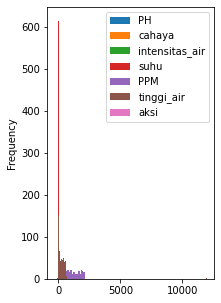

In [521]:
data[['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']].plot.hist(bins=200,figsize=(3,5),alpha=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67443bdad0>,
      dtype=object)

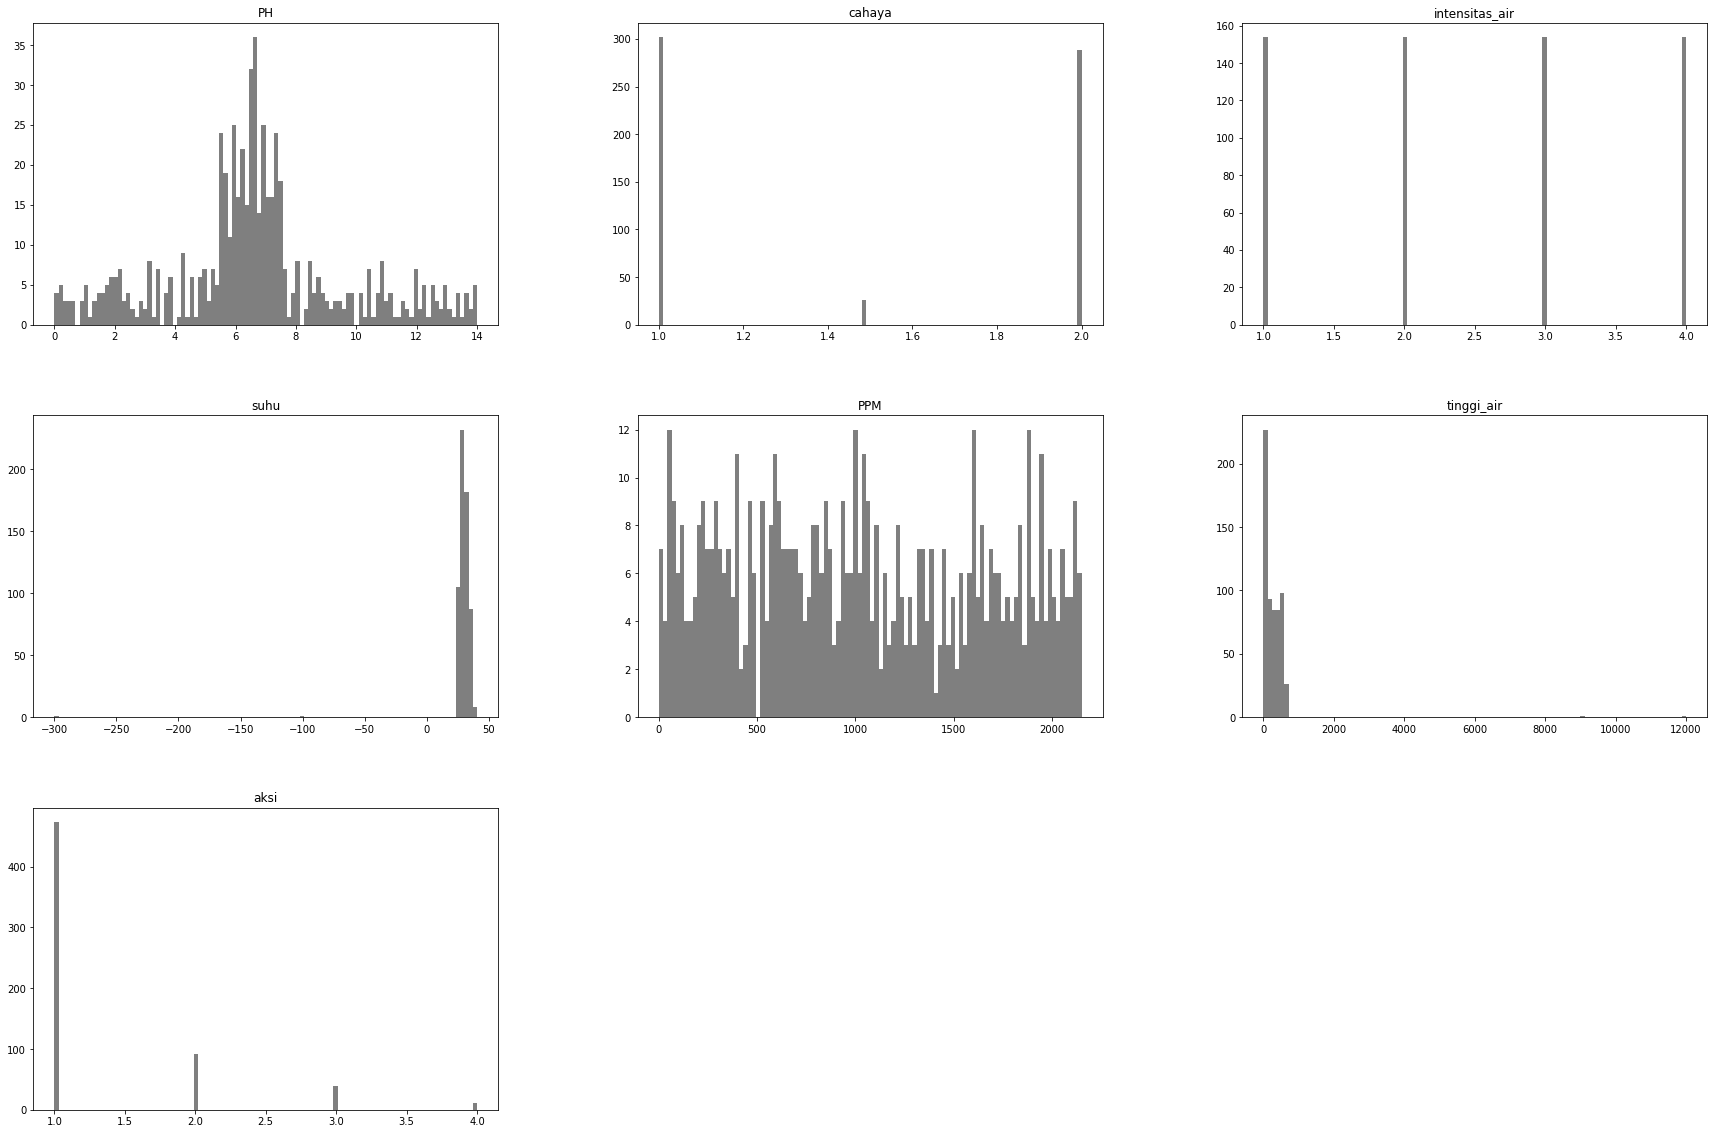

In [522]:
data.hist(figsize=(30,20), bins=100, color="black", grid=False, alpha=0.5)

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [523]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X_smote)
print(X_scaled)
print(len(X_scaled), len(X_smote))

[[0.46428571 0.         1.         0.96007046 0.08705773 0.05183333]
 [0.40714286 0.         1.         0.95977686 0.03631285 0.04641667]
 [0.42857143 0.         1.         0.96007046 0.00465549 0.04091667]
 ...
 [0.90496105 1.         1.         0.95840401 0.06466814 0.03518904]
 [0.73624429 1.         1.         0.95653015 0.03403609 0.03320495]
 [0.90317976 1.         1.         0.95974419 0.23840552 0.0430877 ]]
1892 1892


In [524]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
X_std = preprocessing.StandardScaler().fit(X_smote).transform(X_smote.astype(float))
print(X_std)
print(len(X_std), len(X_smote), len(Y_smote))

[[-0.4362345  -0.83781987  1.14112437 -0.06723406 -0.88305601  0.77838482]
 [-0.72159003 -0.83781987  1.14112437 -0.07909847 -1.0600947   0.60989545]
 [-0.6145817  -0.83781987  1.14112437 -0.06723406 -1.17054086  0.43881394]
 ...
 [ 1.76437553  1.22375223  1.14112437 -0.13457568 -0.96116879  0.26065186]
 [ 0.92185096  1.22375223  1.14112437 -0.21029872 -1.06803784  0.19893527]
 [ 1.75548027  1.22375223  1.14112437 -0.08041888 -0.35503396  0.50634551]]
1892 1892 1892


## 9. Buat model ANN

In [525]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [526]:
y = LabelEncoder().fit_transform(Y_smote)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

n_features = X_train.shape[1]
print(n_features)

(1513, 6) (379, 6) (1513,) (379,)
6


In [527]:
# define model1
model = Sequential()
model.add(Dense(128, input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Dense(16))
model.add(Dense(1, activation='sigmoid'))

# compile model 2
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# fit model 2
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_split=0.3)

Epoch 1/100
34/34 - 1s - loss: 1.5702 - accuracy: 0.2691 - val_loss: 1.7347 - val_accuracy: 0.2423
Epoch 2/100
34/34 - 0s - loss: 1.3920 - accuracy: 0.3059 - val_loss: 1.5321 - val_accuracy: 0.3106
Epoch 3/100
34/34 - 0s - loss: 1.3391 - accuracy: 0.3720 - val_loss: 1.4442 - val_accuracy: 0.3634
Epoch 4/100
34/34 - 0s - loss: 1.3058 - accuracy: 0.3957 - val_loss: 1.4177 - val_accuracy: 0.3789
Epoch 5/100
34/34 - 0s - loss: 1.2814 - accuracy: 0.4278 - val_loss: 1.4104 - val_accuracy: 0.3855
Epoch 6/100
34/34 - 0s - loss: 1.2724 - accuracy: 0.4240 - val_loss: 1.4109 - val_accuracy: 0.3855
Epoch 7/100
34/34 - 0s - loss: 1.2655 - accuracy: 0.4344 - val_loss: 1.4086 - val_accuracy: 0.3899
Epoch 8/100
34/34 - 0s - loss: 1.2710 - accuracy: 0.4278 - val_loss: 1.4140 - val_accuracy: 0.3833
Epoch 9/100
34/34 - 0s - loss: 1.2675 - accuracy: 0.4381 - val_loss: 1.4097 - val_accuracy: 0.3877
Epoch 10/100
34/34 - 0s - loss: 1.2653 - accuracy: 0.4249 - val_loss: 1.4025 - val_accuracy: 0.3921
Epoch 11/

In [528]:
model.summary()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_267 (Dense)            (None, 128)               896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_268 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_269 (Dense)            (None, 32)                2080      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
dense_270 (Dense)            (None, 16)              

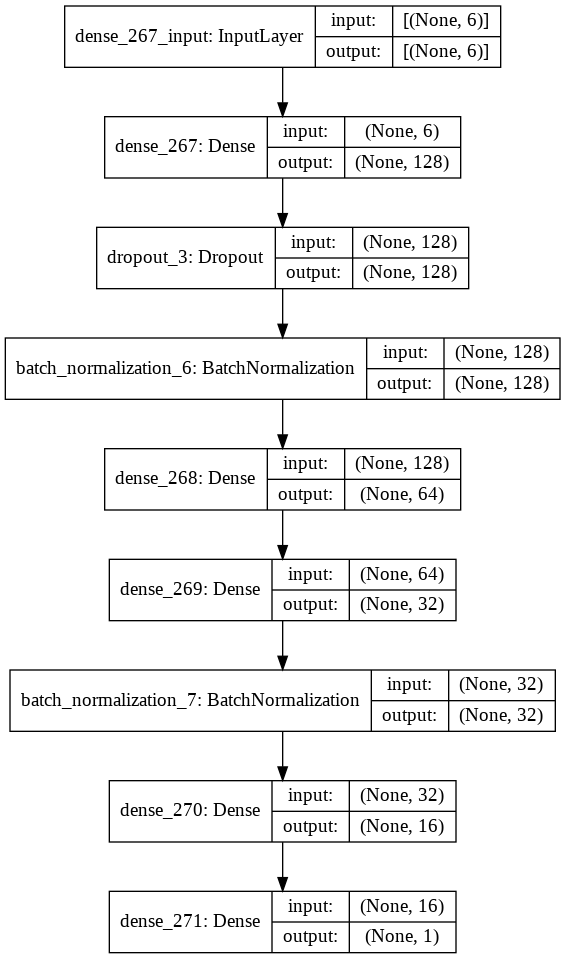

In [529]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model_summary.png', show_shapes=True)

In [530]:
model.evaluate(X_test, y_test, verbose=0)

[1.3883963823318481, 0.4116095006465912]

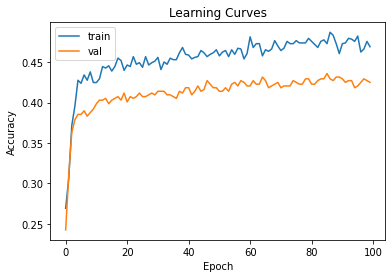

In [531]:
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

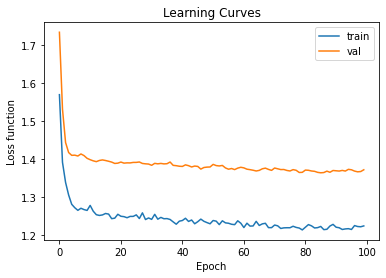

In [532]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss function')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## 10. Build Model KNN

In [533]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=31)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (492, 6) (492,)
Test set: (124, 6) (124,)


In [534]:
from sklearn.neighbors import KNeighborsClassifier
k = 54
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=54, p=2,
                     weights='uniform')

In [535]:
yhat = knn.predict(X_test)
yhat[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [536]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7560975609756098
Test set Accuracy:  0.8467741935483871


In [537]:
Ks = 80
mean_acc = np.zeros((Ks))

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.69354839, 0.80645161, 0.75      , 0.79032258, 0.77419355,
       0.81451613, 0.79032258, 0.80645161, 0.77419355, 0.7983871 ,
       0.78225806, 0.7983871 , 0.78225806, 0.82258065, 0.78225806,
       0.81451613, 0.7983871 , 0.82258065, 0.80645161, 0.81451613,
       0.80645161, 0.81451613, 0.7983871 , 0.7983871 , 0.79032258,
       0.80645161, 0.78225806, 0.80645161, 0.79032258, 0.79032258,
       0.79032258, 0.7983871 , 0.80645161, 0.80645161, 0.7983871 ,
       0.7983871 , 0.7983871 , 0.83064516, 0.82258065, 0.83064516,
       0.81451613, 0.83870968, 0.82258065, 0.83064516, 0.81451613,
       0.83064516, 0.83064516, 0.83870968, 0.83064516, 0.83064516,
       0.83870968, 0.83870968, 0.83870968, 0.84677419, 0.84677419,
       0.83064516, 0.83870968, 0.83064516, 0.83064516, 0.83064516,
       0.83064516, 0.83064516, 0.83064516, 0.83064516, 0.83064516,
       0.83064516, 0.83064516, 0.83064516, 0.83064516, 0.83064516,
       0.83064516, 0.83064516, 0.83064516, 0.83064516, 0.83064

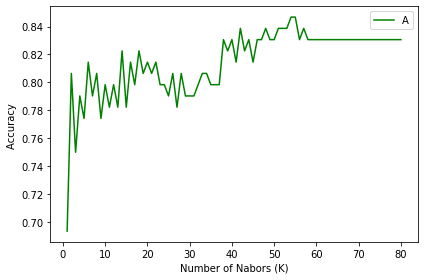

The best accuracy was with 0.8467741935483871 with k= 54


In [538]:
plt.plot(range(1,Ks+1),mean_acc,'g')

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)